In [2]:
import json
import numpy as np
import pandas as pd
import plotly.express as px

fp = '../../modeling/output/SnowSchoolv1.temps.json'

# Opening JSON file
f = open(fp,)
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Closing file
f.close()

res = np.zeros((len(data['profiles']),2))
i = 0
for r in data['profiles']:
    res[i,0]= pd.to_datetime(r['date']).timestamp()
    res[i,1] = (r['comments']['elements'][0]['layers'][-1]['top']/100)
    i += 1

df = pd.DataFrame(res, columns = ['timestamp','hs'])
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
px.line(x = df.date, y = df.hs)    

In [3]:
from funcs.clean import clean
wx = clean('../../snowschool/wx_data/winter_20_21.csv')

/home/zacharykeskinen/Documents/temp/src/analysis/funcs/clean.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
df = df.set_index('date')
df.index = df.index.tz_localize('UTC')

In [5]:
hs_comp = wx.merge(df, left_index = True, right_index = True).dropna(subset = ['hs','snow_depth_1'])[['hs','snow_depth_1']]

In [6]:
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x = hs_comp.index, y = hs_comp['hs'], name = 'Modeled HS', line_color = 'palevioletred'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x = hs_comp.index, y = hs_comp['snow_depth_1'], name = 'Field HS', line_color = 'blue'),
    row=1, col=1
)

fig.write_image('../../figures/hs_compare.png')
fig.write_html('../../figures/hs_compare.html')

<AxesSubplot:xlabel='date_time'>

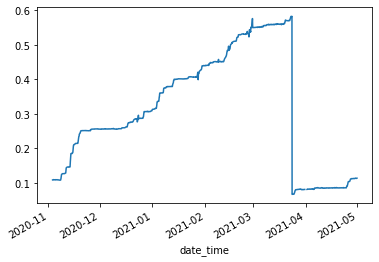

In [10]:
sub['precip_accum_1'].plot()

In [7]:
def wind_subset(i):
    if i == 'ENE' or i == 'E' or i == 'ESE':
        j = 'E'
    if i == 'WSW' or i == 'W' or i == 'WNW':
        j = 'W'
    if i == 'SSW' or i == 'S' or i == 'SSE':
        j = 'S'
    if i == 'NNW' or i == 'N' or i == 'NNE':
        j = 'N'
    if i == 'NE' or i == 'NW' or i == 'SW' or i == 'SE':
        j = i
    return j

sub = wx[wx.index > ('2020-11-01')]
sub_wind = sub.dropna(subset = ['wind_cardinal_direction_1d'])
sub_wind['wind_dir_lim'] = sub_wind.wind_cardinal_direction_1d.apply(wind_subset)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1, subplot_titles=("Temp", "Precipitation and SWE", "Wind", "Radiation"))

fig.add_trace(
    go.Scatter(x = sub.index, y = sub['airtemp_2.0'], name = '2.0m Air Temp (C)', line_color = 'palevioletred'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x = sub.index, y = sub['snow_depth_1'], name = 'Snow Depth (m)', line_color = 'blue'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x = sub.index, y = sub['precip_accum_1'], name = 'Precip (m)', line_color = 'black'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x = sub.index, y = sub['wind_speed_1'], name = 'Wind Speed (kph)'),
    row=3, col=1
)
    

fig.add_trace(
    go.Scatter(x = sub.index, y = sub['net_radiation_1'], name = 'Net Radiation (W/M2)'),
    row=4, col=1
)


from statistics import mode
a= sub_wind['wind_dir_lim'].resample('d').apply(lambda x: mode(x))
figure1 = px.scatter(x= a.index, 
                     y=np.zeros_like(a.index)-2,
                     color = a.values)
figure1_traces = []
for trace in range(len(figure1["data"])):
    figure1_traces.append(figure1["data"][trace])
for traces in figure1_traces:
    fig.append_trace(traces, row=3, col=1)

fig.update_layout(height=1200, width=1400, title_text="Snow School (WWA01) Winter 2020-21 Weather")

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.665,
    xanchor="right",
    x=1.2,
    title_font_family="Times New Roman",
        font=dict(
            family="Times New Roman",
            size=16,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
))
fig.show()
fig.write_image('../../figures/wx_summary.png')
fig.write_html('../../figures/wx_summary.html')

<ipython-input-7-3505b90203a2>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

